In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datasets import load_dataset
import ast

#loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#cleaning data
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] =df["job_skills"].apply(lambda x :ast.literal_eval(x) if pd.notna(x) else x)

# What is the optimal skill to learn for Data Analysts?

In [24]:
df_DA_US = df[(df["job_title_short"]=="Data Analyst") & (df["job_country"]=="United States")].copy()
df_DA_US = df_DA_US.dropna(subset=["salary_year_avg"])

In [25]:
df_DA_US_exploded = df_DA_US.explode("job_skills")
df_DA_skills = df_DA_US_exploded.groupby("job_skills")["salary_year_avg"].agg(["count","median"]).sort_values(by="count",ascending=False)
df_DA_US_skills = df_DA_skills.rename(columns={"count":"skills_count","median":"median_salary"})
DA_job_count = len(df_DA_US)
df_DA_US_skills["skill_percent"] = df_DA_US_skills["skills_count"]/len(df_DA_US) * 100

skill_percent = 5
df_DA_skills_high_demand = df_DA_US_skills[df_DA_US_skills["skill_percent"] > skill_percent]
df_DA_skills_high_demand


,skills_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


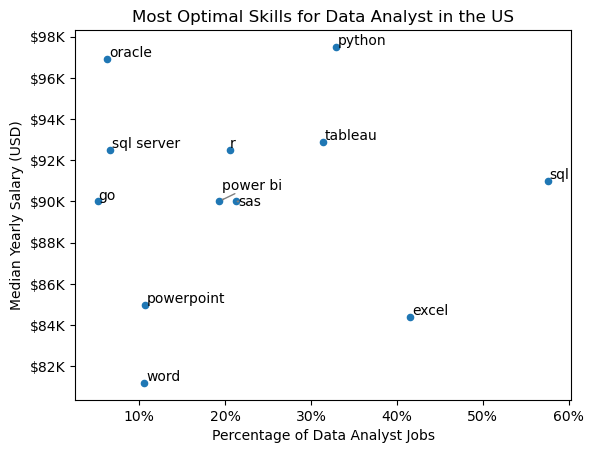

In [26]:
from adjustText import adjust_text
df_DA_skills_high_demand.plot(kind="scatter",x="skill_percent",y="median_salary")
texts = []
for i,txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand["skill_percent"].iloc[i],df_DA_skills_high_demand["median_salary"].iloc[i],txt))
adjust_text(texts,arrowprops=dict(arrowstyle="->",color="gray"))
plt.title("Most Optimal Skills for Data Analyst in the US")
plt.ylabel("Median Yearly Salary (USD)")
plt.xlabel("Percentage of Data Analyst Jobs")
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

In [27]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['word',
  'msaccess',
  'qlik',
  'spss',
  'sas',
  'cognos',
  'sheets',
  'excel',
  'datarobot',
  'esquisse',
  'ssis',
  'microstrategy',
  'tableau',
  'sharepoint',
  'powerpoint',
  'nuix',
  'ms access',
  'sap',
  'alteryx',
  'visio',
  'power bi',
  'dax',
  'splunk',
  'ssrs',
  'looker',
  'outlook',
  'spreadsheet',
  'powerbi'],
 'programming': ['python',
  'f#',
  'nosql',
  'css',
  'r',
  'sas',
  'objective-c',
  'typescript',
  'scala',
  'sass',
  'mongodb',
  'groovy',
  'powershell',
  'rust',
  'perl',
  'pascal',
  'matlab',
  'lua',
  'java',
  'clojure',
  'julia',
  'go',
  'visual basic',
  'c#',
  'solidity',
  'swift',
  'haskell',
  'ruby',
  'apl',
  'erlang',
  'vb.net',
  'c++',
  'shell',
  't-sql',
  'crystal',
  'assembly',
  'javascript',
  'visualbasic',
  'elixir',
  'ocaml',
  'no-sql',
  'lisp',
  'php',
  'fortran',
  'delphi',
  'html',
  'kotlin',
  'bash',
  'c',
  'dart',
  'vba',
  'golang',
  'sql',
  'cobol',
  'mo

In [28]:
df_technology = pd.DataFrame(list(technology_dict.items()),columns=("technology","skills"))
df_technology = df_technology.explode("skills")


In [29]:
df_plot = df_DA_skills_high_demand.merge(df_technology,left_on="job_skills",right_on="skills")

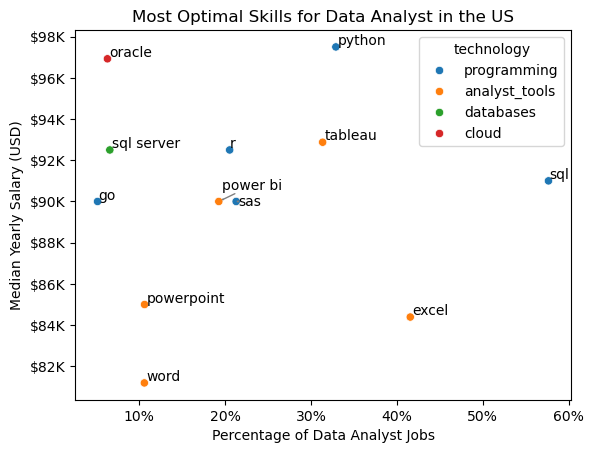

In [30]:
sns.scatterplot(data=df_plot,x="skill_percent",y="median_salary",hue="technology")
texts = []
for i,txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand["skill_percent"].iloc[i],df_DA_skills_high_demand["median_salary"].iloc[i],txt))
adjust_text(texts,arrowprops=dict(arrowstyle="->",color="gray"))
plt.title("Most Optimal Skills for Data Analyst in the US")
plt.ylabel("Median Yearly Salary (USD)")
plt.xlabel("Percentage of Data Analyst Jobs")
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))